# 해외 온라인 판매액 분석(K-뷰티)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 시각화를 위한 폰트 설정
import os

if os.name == 'nt':
    sns.set(font="Malgun Gothic")

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

# 데이터 로드하기
- e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호

In [133]:
dfdf = pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201129174222.csv', encoding="cp949")

In [134]:
dfdf.head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,897205,921586,974060,1250236,1344404,1525396,1879499,1525487,1277716,1615969
1,합계,합계,면세점,-,-,-,-,-,-,-,...,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1421509
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,171886,159750,203404,179543,187246,189024,223864,227997,225729,194460
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,3854,4320,4511,3702,4038,3670,3826,4142,3812,7777
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,6,1,215,2,0,1,70,113,0,3497


In [135]:
dfdf.shape

(450, 30)

In [136]:
dfdf['국가(대륙)별'].value_counts()

일본            45
기타            45
아세안(ASEAN)    45
중남미           45
중동            45
대양주           45
합계            45
미국            45
유럽연합(EU)      45
중국            45
Name: 국가(대륙)별, dtype: int64

# 분석과 시각화를 위한 tidy data 만들기

In [138]:
dfdf.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4',
       '2020 3/4 p)'],
      dtype='object')

In [139]:
df = dfdf.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name = "기간", value_name = '백만원')

In [140]:
df.shape

(12150, 5)

In [141]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  12150 non-null  object
 1   상품군별     12150 non-null  object
 2   판매유형별    12150 non-null  object
 3   기간       12150 non-null  object
 4   백만원      12150 non-null  object
dtypes: object(5)
memory usage: 474.7+ KB


# 데이터 전처리

## 기간에서 연도 분리하기

In [143]:
df['기간']

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
12145    2020 3/4 p)
12146    2020 3/4 p)
12147    2020 3/4 p)
12148    2020 3/4 p)
12149    2020 3/4 p)
Name: 기간, Length: 12150, dtype: object

In [36]:
int('2020 3/4 p)'.split()[0])

2020

In [144]:
df['연도'] = df['기간'].map(lambda x : int(x.split()[0]))

In [145]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [50]:
'2020 3/4 p)'.split()[1].split('/')[0]

'3'

In [146]:
# 기간에서 분기만 분리하기
df['분기'] = df['기간'].map(lambda x : int(x.split()[1].split('/')[0]))

In [147]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [149]:
import numpy as np

df['백만원'] = df['백만원'].replace('-', np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


## 필요없는 데이터 제거하기

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  12150 non-null  object 
 1   상품군별     12150 non-null  object 
 2   판매유형별    12150 non-null  object 
 3   기간       12150 non-null  object 
 4   백만원      8550 non-null   float64
 5   연도       12150 non-null  int64  
 6   분기       12150 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 664.6+ KB


In [151]:
# 합계데이터 제거하기
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10206 entries, 48 to 12149
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10206 non-null  object 
 1   상품군별     10206 non-null  object 
 2   판매유형별    10206 non-null  object 
 3   기간       10206 non-null  object 
 4   백만원      7182 non-null   float64
 5   연도       10206 non-null  int64  
 6   분기       10206 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 637.9+ KB


In [152]:
df.isnull().sum() # true 값의 개수 세기, 3024개의 결측치

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 전체 상품군 판매액

In [153]:
df_total = df[df['판매유형별'] == '계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


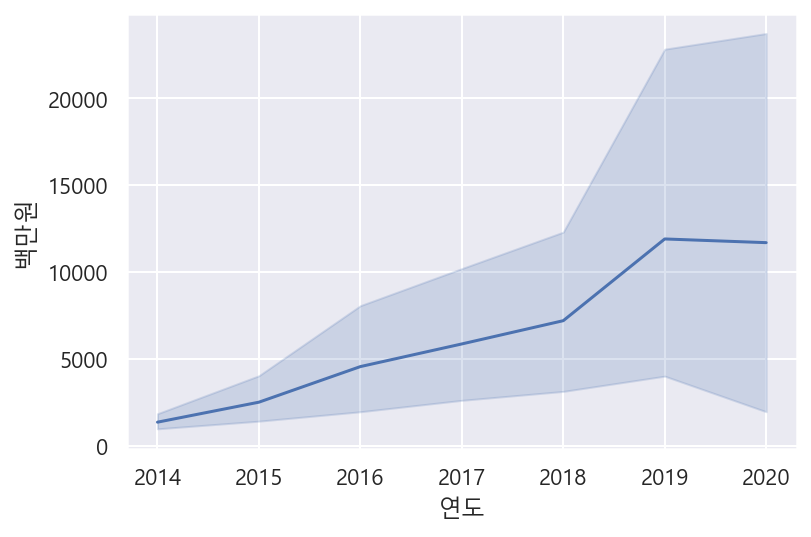

In [154]:
sns.lineplot(data=df_total, x='연도', y='백만원')

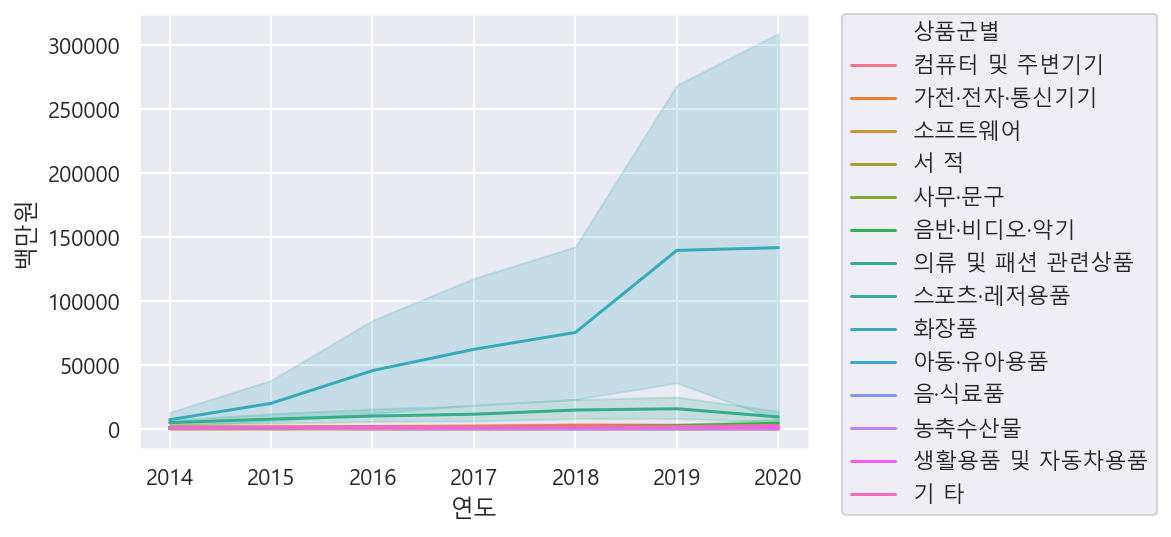

In [79]:
sns.lineplot(data=df_total, x='연도', y='백만원', hue='상품군별')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 레전드를 바깥으로

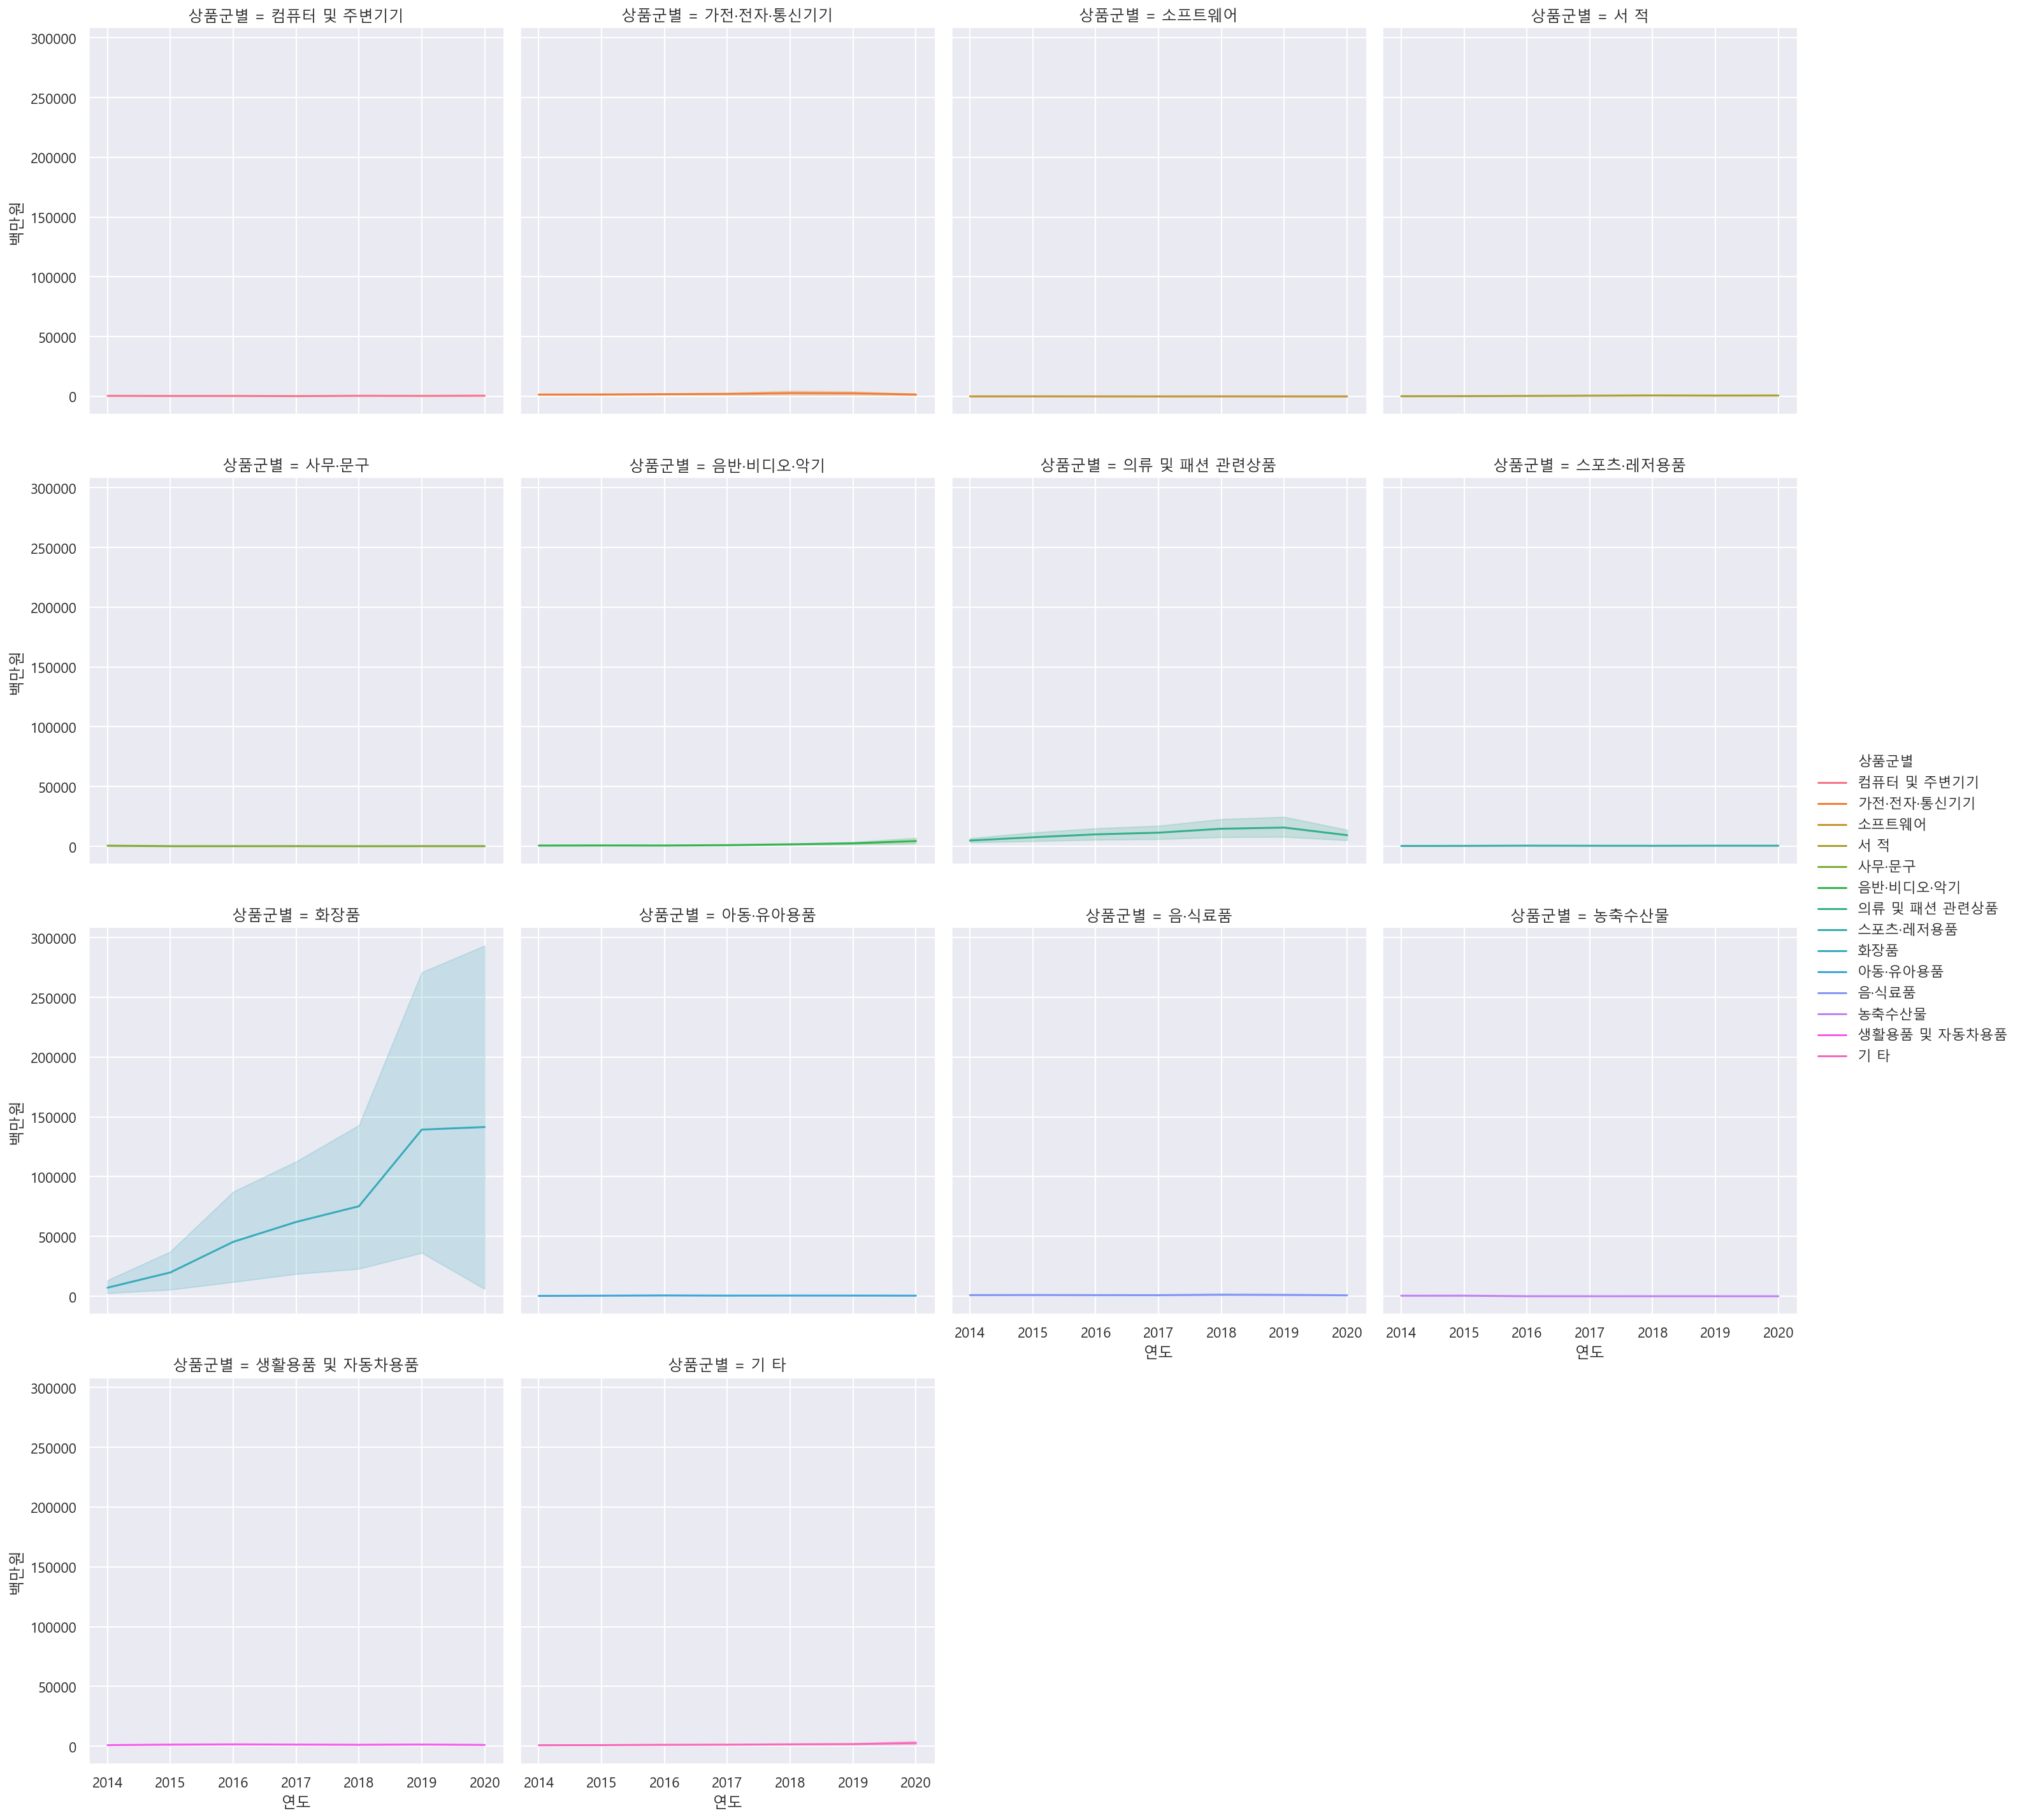

In [85]:
sns.relplot(data=df_total, x='연도', y='백만원', hue='상품군별', kind='line', col='상품군별', col_wrap=4)

In [95]:
df_sub = df_total[-df_total['상품군별'].isin(['화장품', '의류 및 패션 관련상품'])].copy() # 화장품 제거

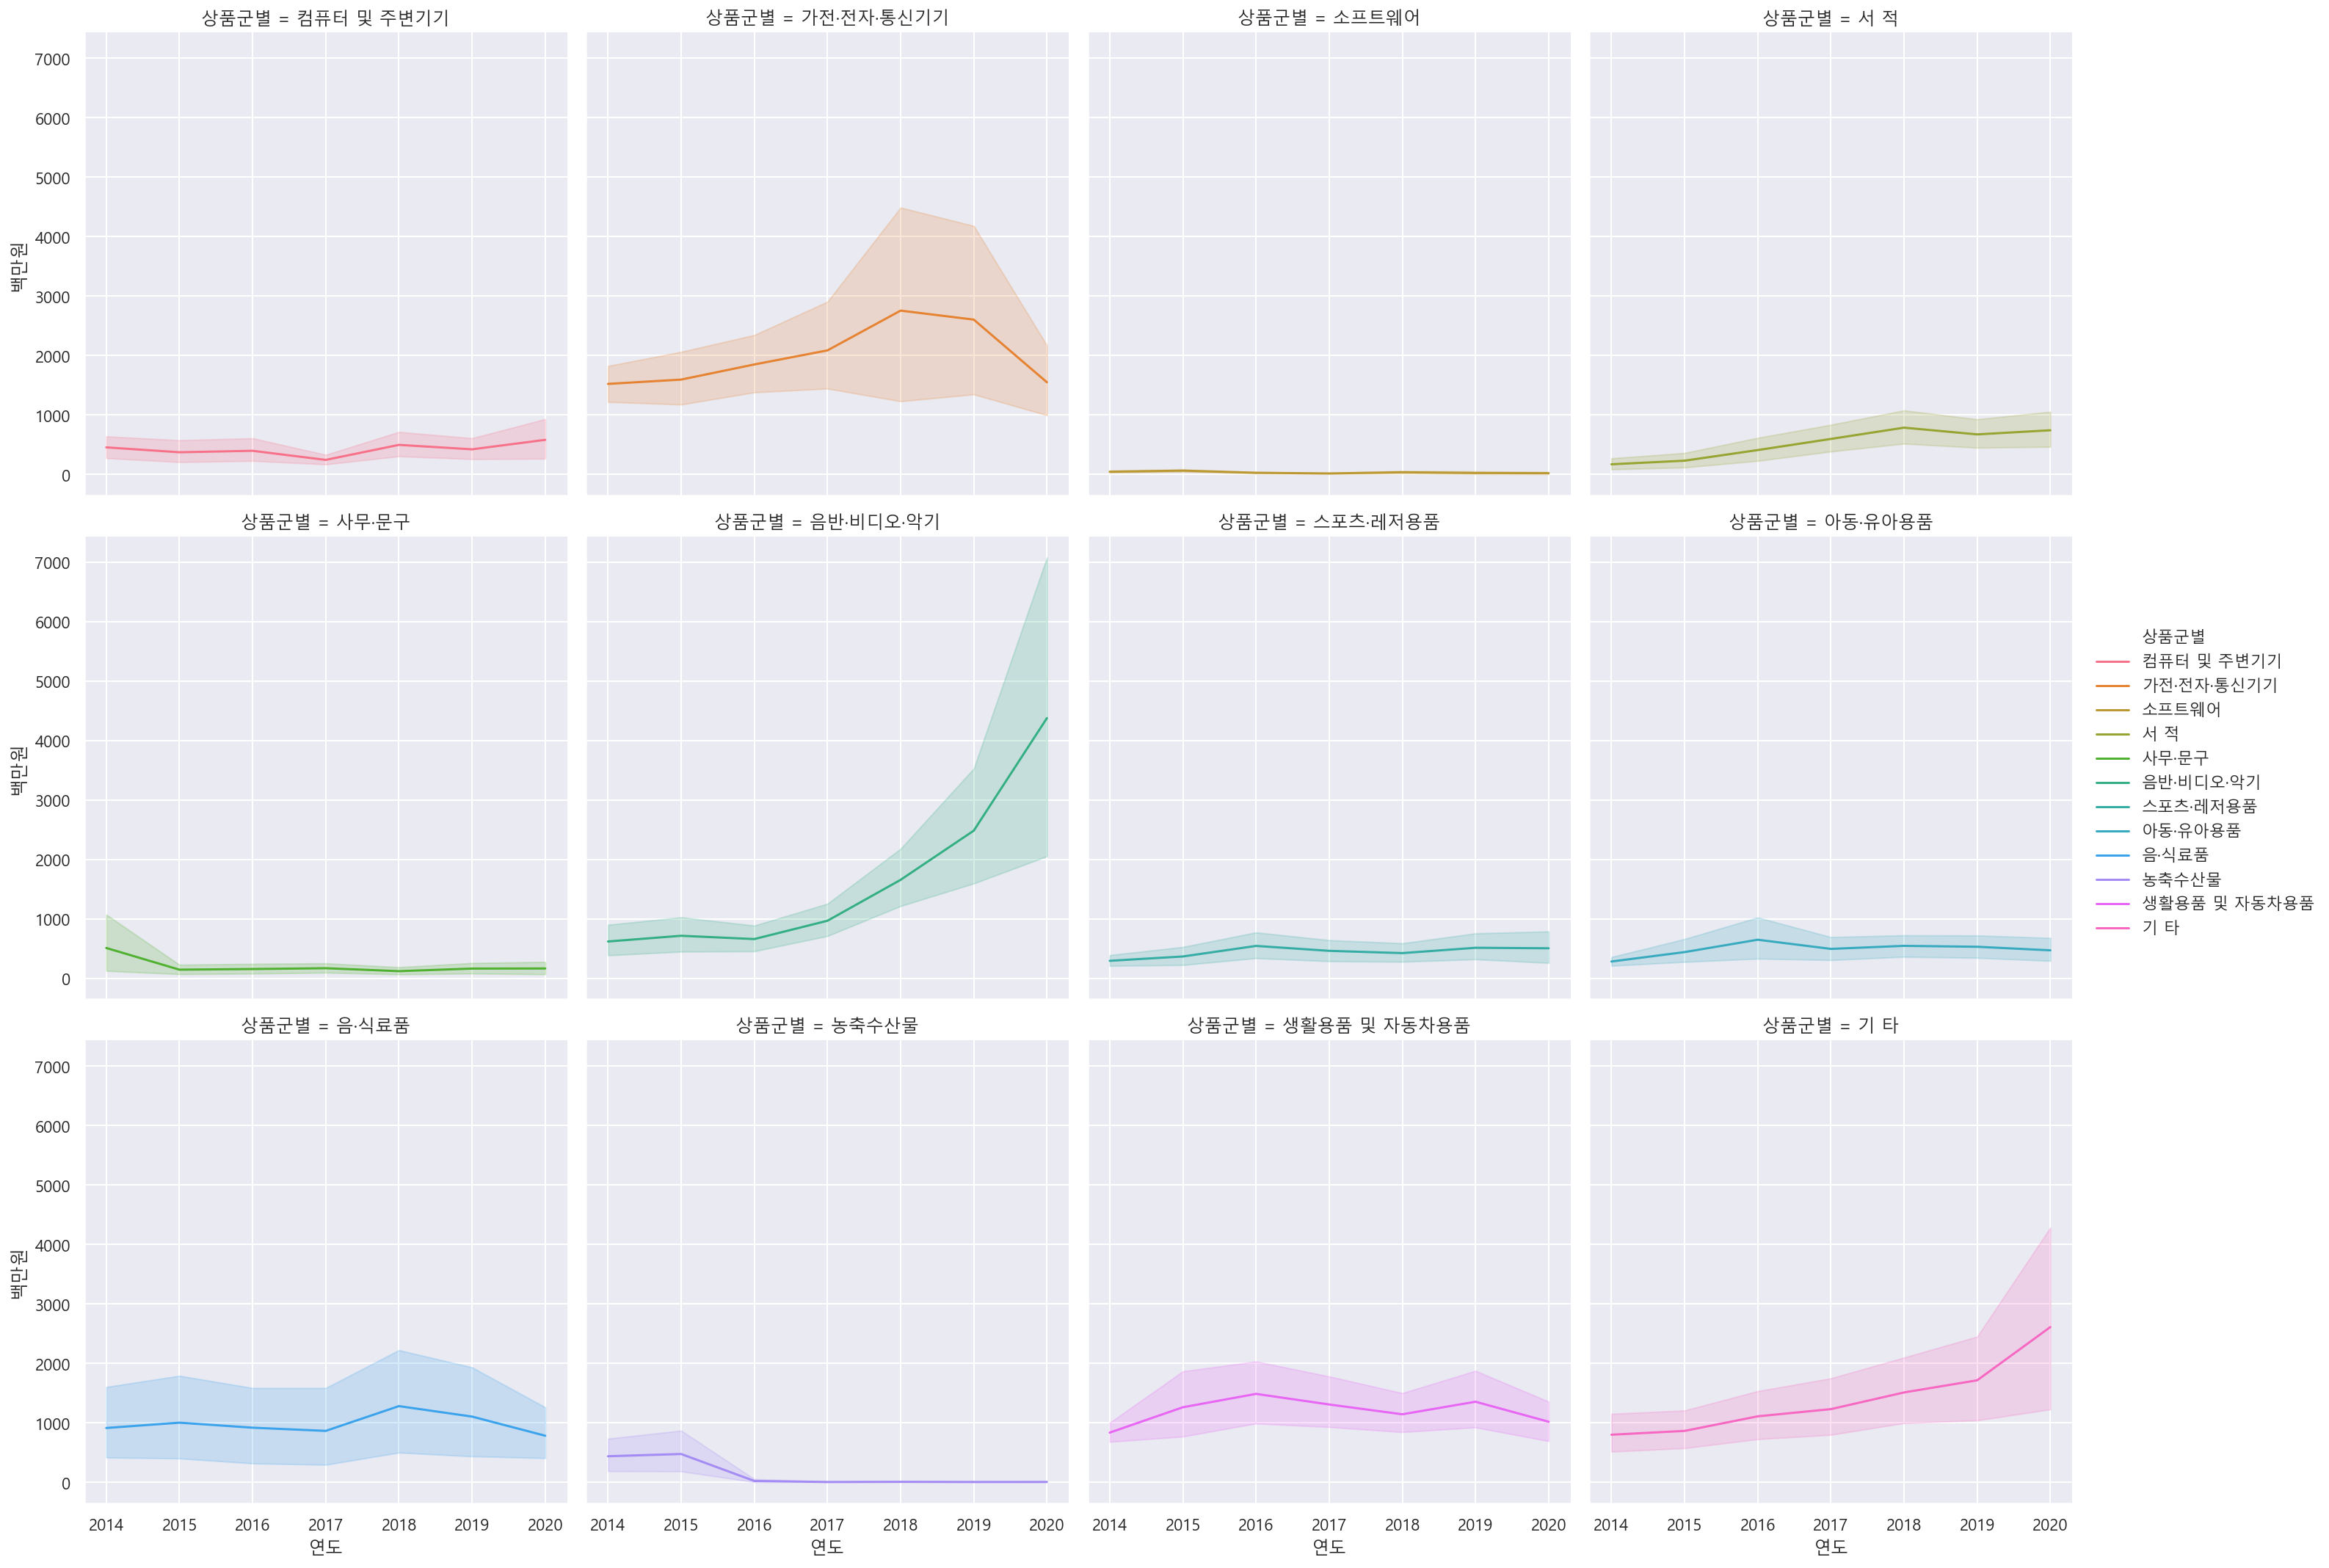

In [96]:
# 화장품, 패션관련상품을 제외한 그래프 작성
sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별', kind='line', col='상품군별', col_wrap=4)

## 화장품의 온라인쇼핑 해외직접판매액

In [99]:
# 화장품 데이터만 가져오기
df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

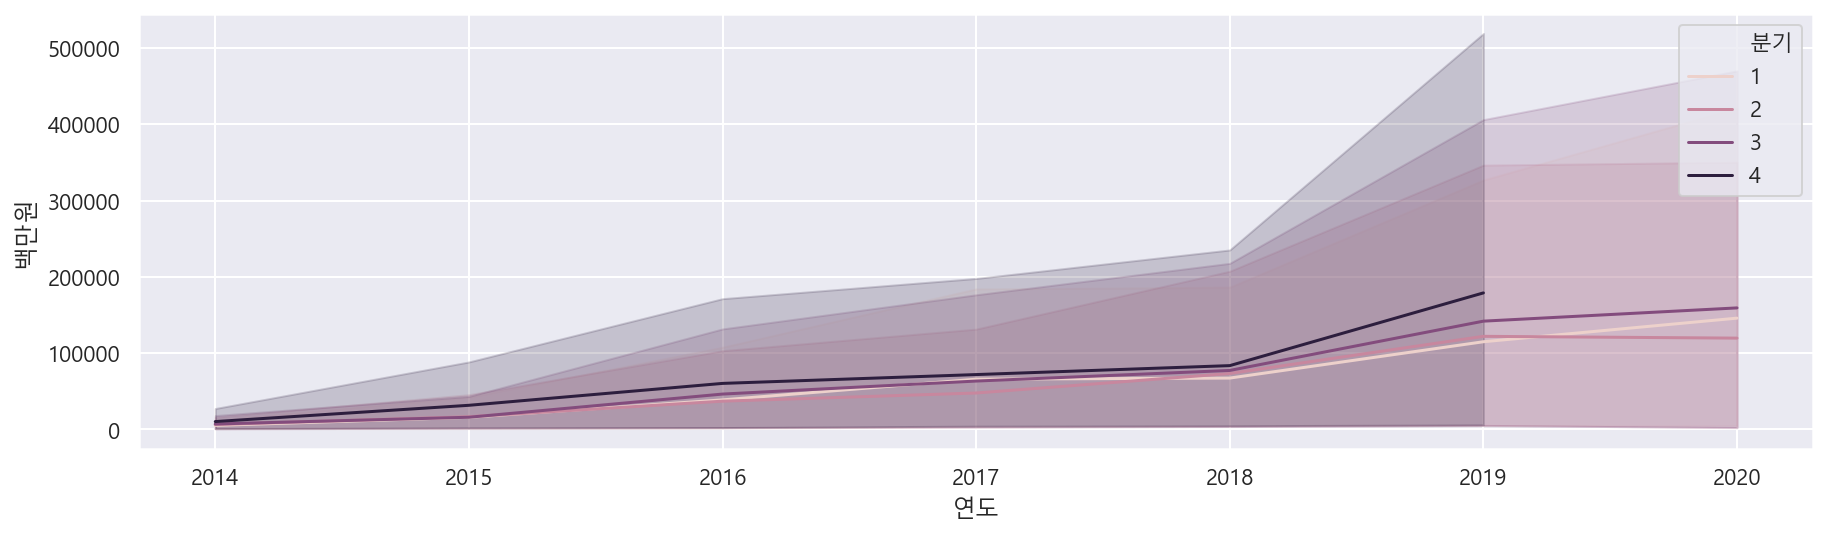

In [101]:
plt.figure(figsize=(15,4)) # 그래프 사이즈 지정(x, y)
sns.lineplot(data=df_cosmetic, x='연도', y='백만원', hue='분기')

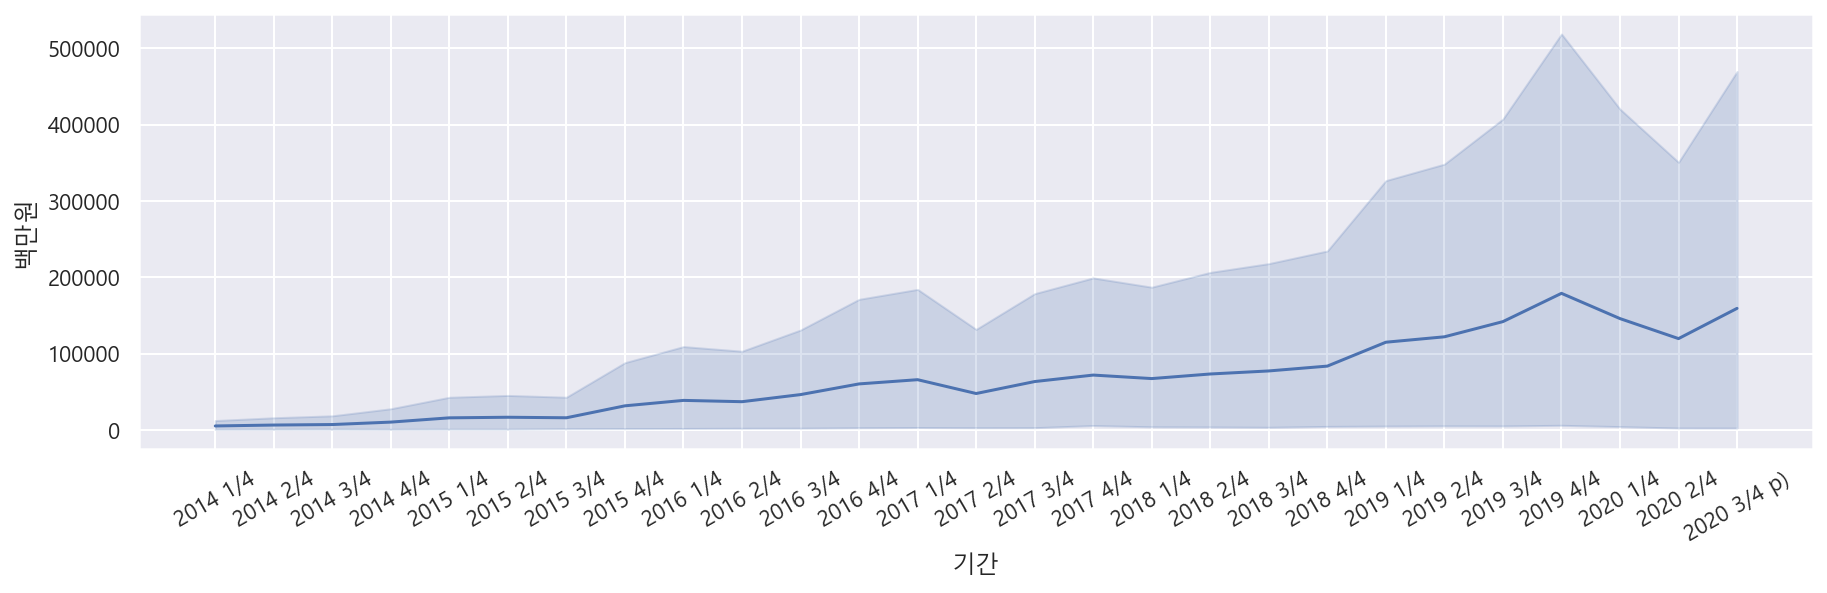

In [102]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원')

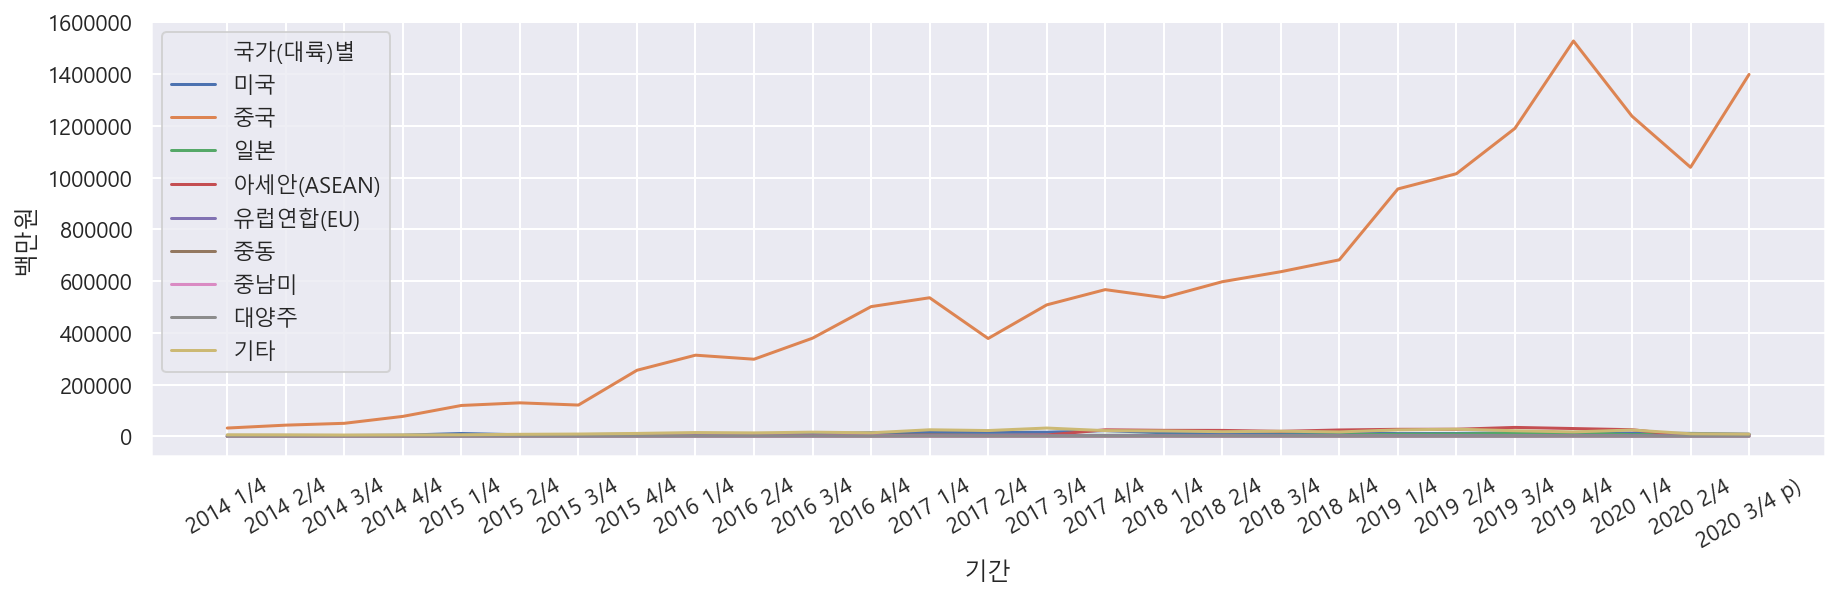

In [105]:
# 판매 국가별 구분(색 다르게)
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원', hue='국가(대륙)별')

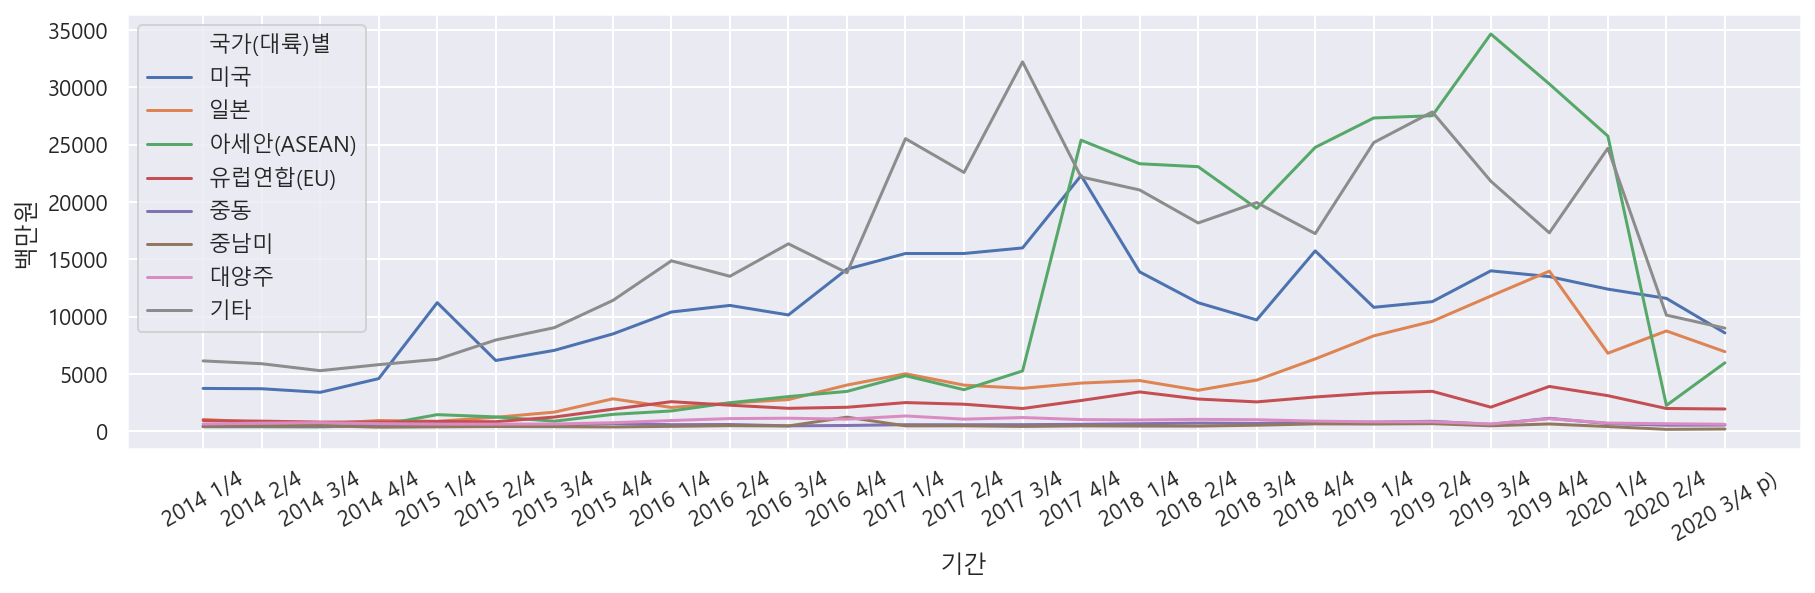

In [106]:
# 판매 국가별 구분(1위인 중국을 제외하고)
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'], x='기간', y='백만원', hue='국가(대륙)별')

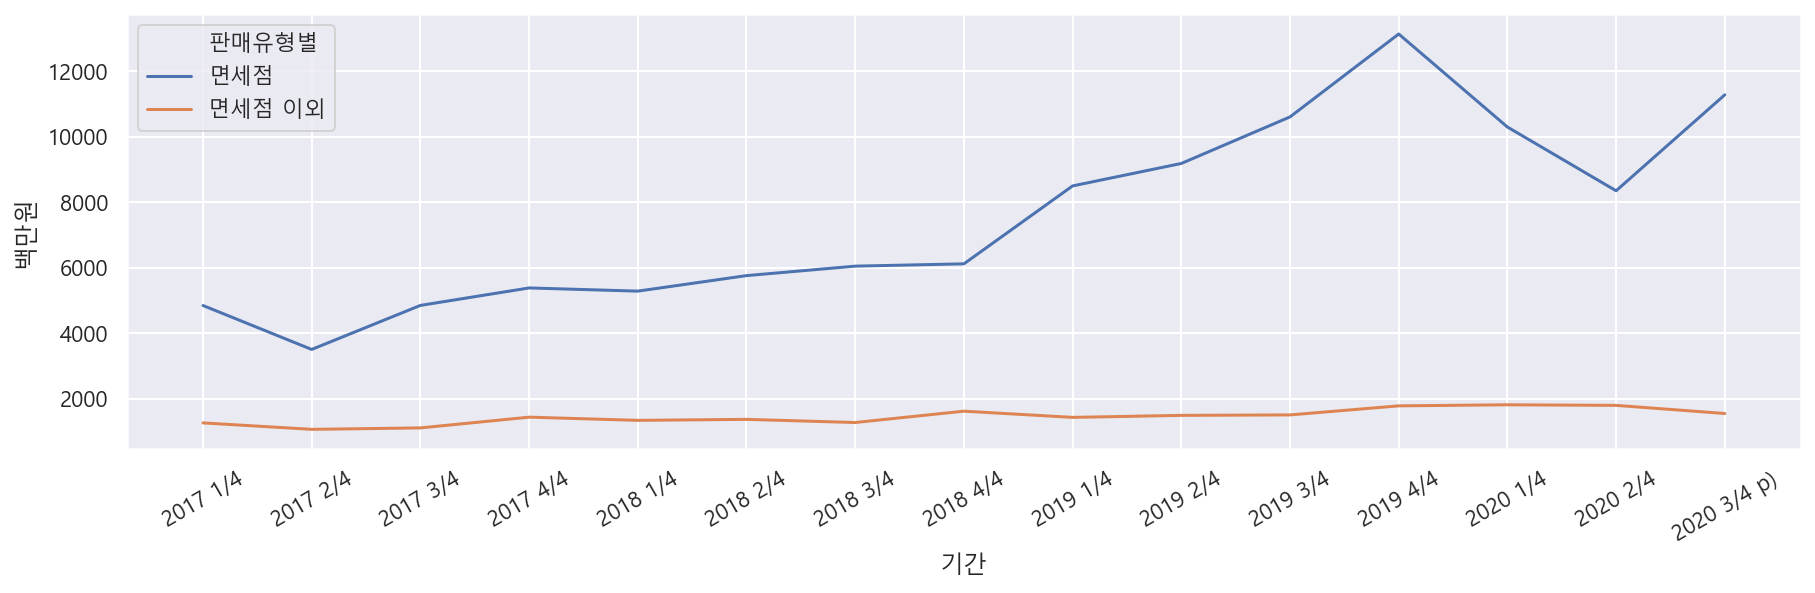

In [112]:
df_sub = df[df['판매유형별'] != '계'].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x='기간', y='백만원', hue='판매유형별', ci=None)

## 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [125]:
df_fashion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] == '계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


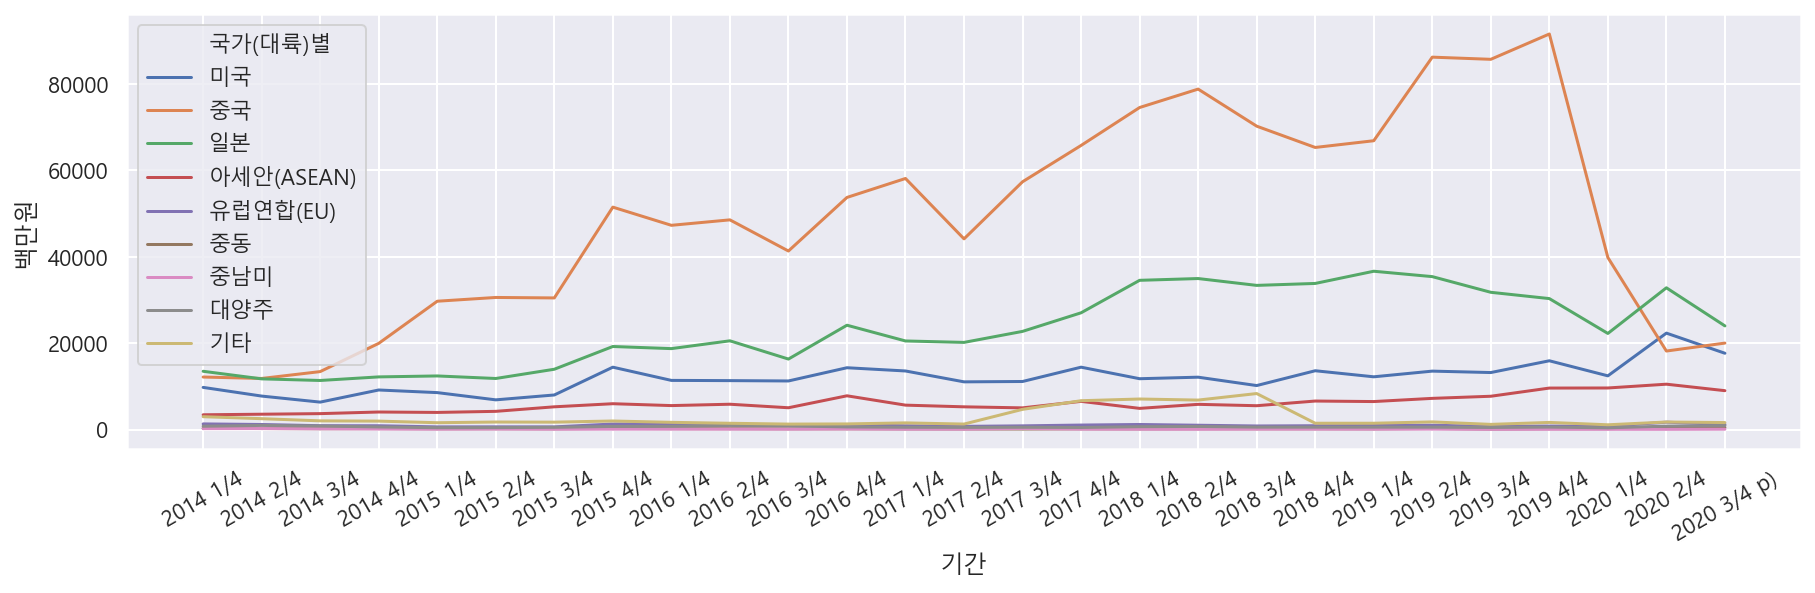

In [128]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간', y='백만원', hue='국가(대륙)별')

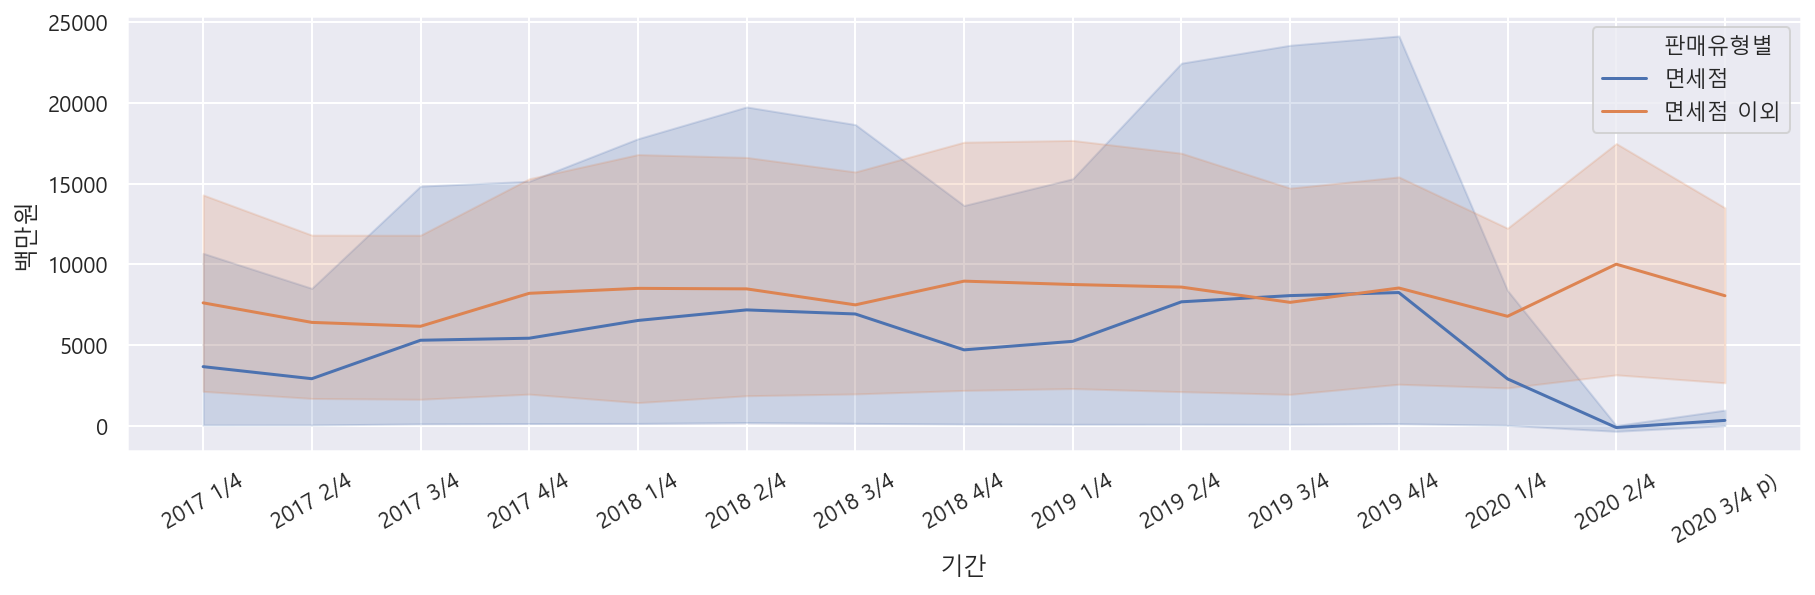

In [130]:
df_fashion2 = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] != '계')].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x='기간', y='백만원', hue='판매유형별') # ci는 신뢰구간을 뜻함